In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [8]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
dataset.shape

(200, 5)

Unique ja missing values summat

In [15]:
summary = pd.DataFrame({
    'Missing Values': dataset.isnull().sum(),
    'Unique Values': dataset.nunique()
})

print(summary)


                        Missing Values  Unique Values
CustomerID                           0            200
Genre                                0              2
Age                                  0             51
Annual Income (k$)                   0             64
Spending Score (1-100)               0             84


In [16]:
df = dataset.iloc[:,3:5]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [23]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [17]:
colnames = df.columns
colnames

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [63]:
X = df.values
X[0:10]

array([[15, 39,  3],
       [15, 81,  4],
       [16,  6,  3],
       [16, 77,  4],
       [17, 40,  3],
       [17, 76,  4],
       [18,  6,  3],
       [18, 94,  4],
       [19,  3,  3],
       [19, 72,  4]])

### Cluster analyses
First step to find the number of cluster
viisi viivaa puolen välin yläpuolella

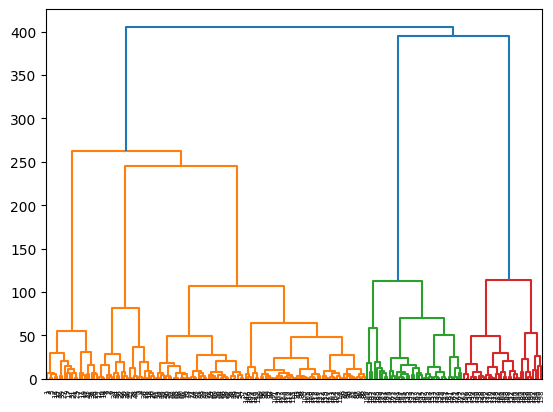

In [ ]:
from scipy.cluster import hierarchy
dendrogrammi = hierarchy.dendrogram(hierarchy.linkage(X, method = "ward"))

In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,20):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # tätä voi tarkastella myös ilman inertiaa

print(wcss)


[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 38831.146380835475, 30259.65720728547, 27802.799603047602, 26628.655467619898, 20033.169133906726, 17577.687828862057, 16429.947379813173, 14983.650422136623, 14202.396927620184, 12620.619721264577, 10924.30020468038, 10123.681779769939, 9640.607000868442, 9494.562069874572]


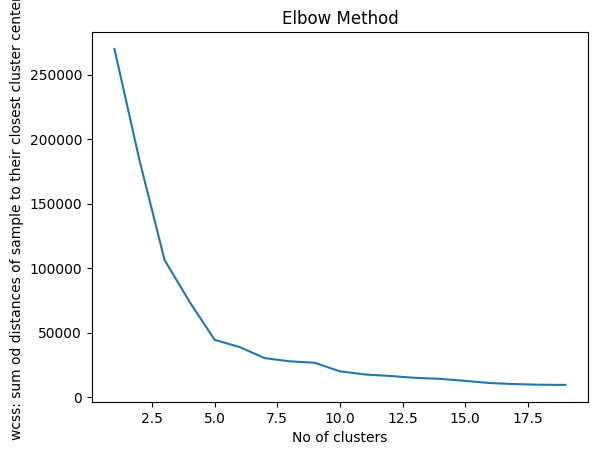

In [29]:
plt.plot(range(1,20), wcss) # x-akselille 1-20, ja y-akselille wcss
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("wcss: sum od distances of sample to their closest cluster center")
plt.show()


In [30]:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(X)

KMeans(n_clusters=5)

In [32]:
cluster_pred = kmeans_5.predict(X)
print(cluster_pred)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [33]:
cluster_labels = kmeans_5.labels_
print(cluster_labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [34]:
cluster_center = kmeans_5.cluster_centers_
cluster_center

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [35]:
centroids_df = pd.DataFrame(cluster_center, columns=colnames)
centroids_df

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,88.200000,17.114286
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636


In [36]:
df["centroids"] = cluster_labels
df.head()

,Annual Income (k$),Spending Score (1-100),centroids
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [ ]:
montako = df.groupby("centroids").count()
print(montako)

           Annual Income (k$)  Spending Score (1-100)
centroids                                            
0                          81                      81
1                          35                      35
2                          39                      39
3                          23                      23
4                          22                      22


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

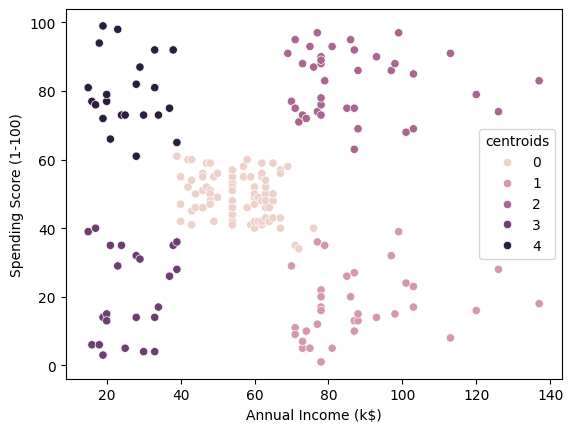

In [43]:
import seaborn as sns
sns.scatterplot(data = df, x = "Annual Income (k$)", y= "Spending Score (1-100)", hue="centroids")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

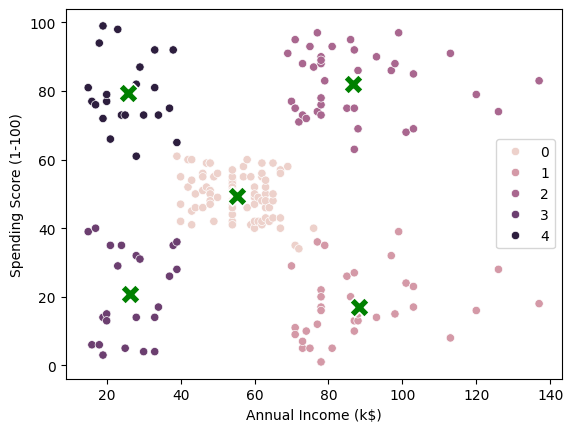

In [46]:
import seaborn as sns
sns.scatterplot(data = df, x = "Annual Income (k$)", y= "Spending Score (1-100)", hue="centroids")
sns.scatterplot(data=centroids_df, x="Annual Income (k$)", y= "Spending Score (1-100)", marker = "X", color = "green", s= 200 )

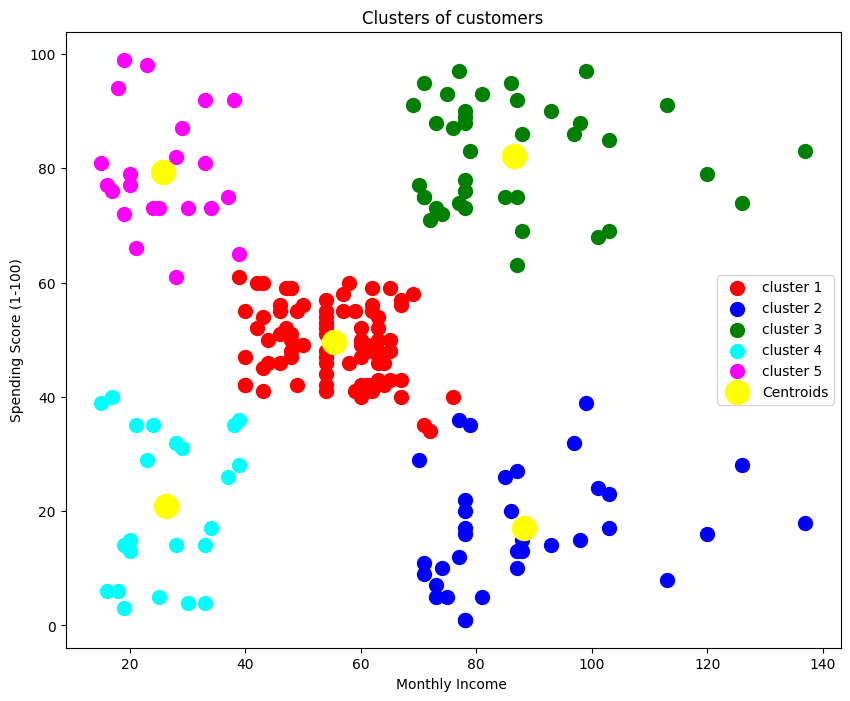

In [47]:
# Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [53]:

asnro1 = np.array([[20, 75]])
asnro1

array([[20, 75]])

In [55]:
asnro1_enn = kmeans_5.predict(asnro1)
asnro1_enn

array([4], dtype=int32)